In [1]:
import joblib
import numpy as np

### extracting ckks data (with rescaling)

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

### extracting ckks data (without rescaling)

In [3]:
file_path = 'variables_ckks2.pkl'

data = joblib.load(file_path)

weights_unenc_ckks2, bias_unenc_ckks2, accuracy_ckks2, y_pred_unenc_ckks2, cpu_seconds_ckks2, cpu_usages_ckks2, ram_usages_ckks2, train_time_ckks2, testing_time_ckks2 = data

### extractng skleanr data

In [4]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

### extracting paillier data:

In [5]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

### evaluating precision of ckks

In [6]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9728966685488425
P-value: 3.4521785374893796e-14


In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.01200106529121429


### evaluating precision of ckks (without rescaling):

In [8]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks2)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9209486166007905
P-value: 1.237495744377034e-09


In [9]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks2)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.015294613192515107


### evaluating precision of paillier:

In [10]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9604743083003954
P-value: 1.4265108425805524e-12


In [11]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.011436083652061741


In [12]:
weights_unenc_sklearn

array([ 0.0026197 ,  0.35270613, -0.04674254,  0.25827197, -0.17617417,
       -0.0575887 ,  0.01120948, -0.0302247 ,  0.56965542,  0.15755994,
        0.26621794,  0.35582929,  0.19331569,  0.14587515,  0.26236846,
        0.12869004,  0.14603775, -0.1310231 , -0.17640284, -0.40419094,
       -0.49492124, -0.17043512])

In [13]:
weights_unenc_paillier

[-0.09257470732888123,
 0.37967772544504574,
 -0.04001377466296218,
 0.3670776022740226,
 -0.342987737782533,
 -0.28123127689999544,
 0.11612146280174387,
 -0.15590603213256582,
 0.6981462309318129,
 0.0607281875344628,
 0.33831070286523374,
 0.5028699200483105,
 0.20634731068769452,
 0.15359242911968146,
 0.32891540183909324,
 0.11684959959496585,
 0.09840122286050652,
 -0.12418113391012785,
 -0.22772926663612625,
 -0.5274519033705384,
 -0.7025390981542369,
 -0.23769445061295982]

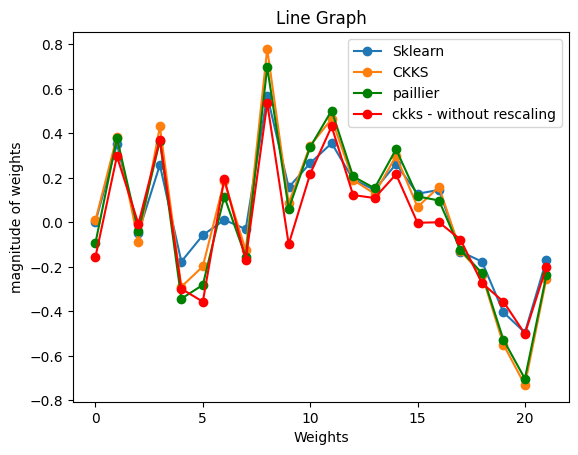

In [14]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  
plt.plot(weights_unenc_ckks2, label='ckks - without rescaling', marker='o', color='red')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

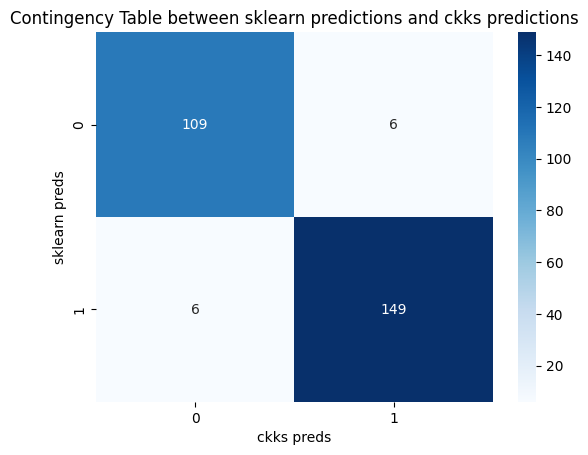

In [15]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

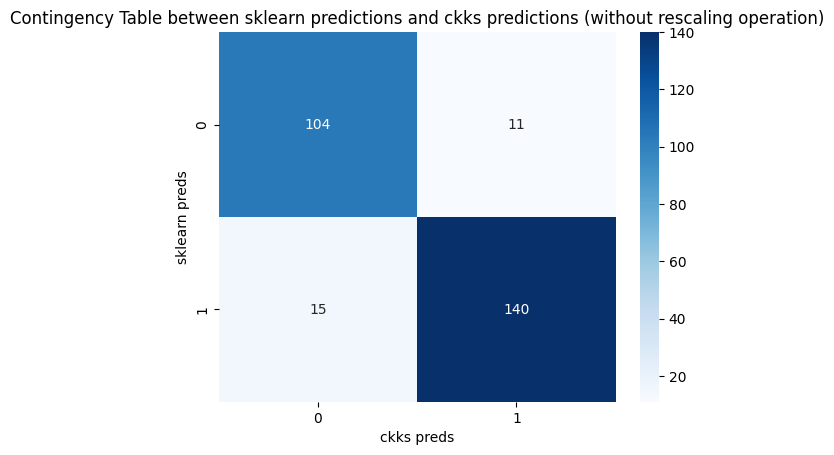

In [16]:
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks2}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions (without rescaling operation)')

plt.show()

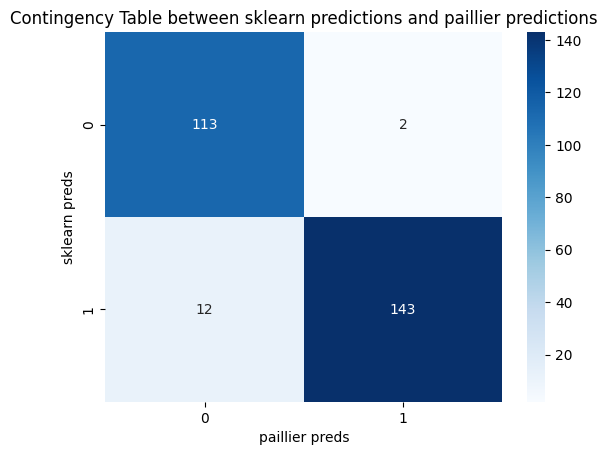

In [17]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

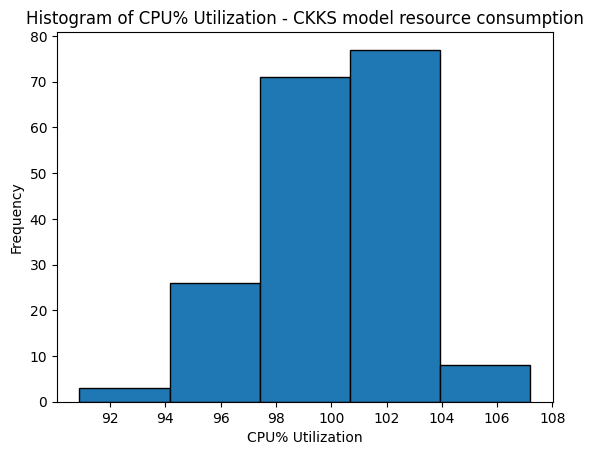

In [18]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [19]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

100.15243243243243
100.5


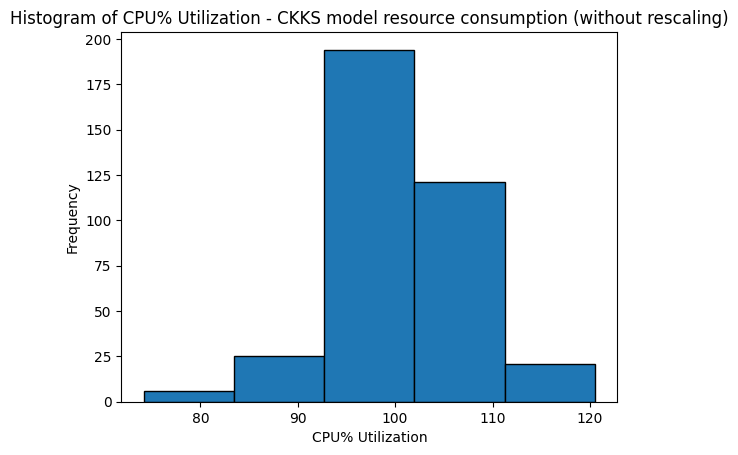

In [20]:
# Plot the histogram

filtered_ckks_cpu_util2 = [x for x in cpu_usages_ckks2 if x >= 70]

plt.hist(filtered_ckks_cpu_util2, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption (without rescaling)')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [21]:
print(np.mean(filtered_ckks_cpu_util2))
print(np.median(filtered_ckks_cpu_util2))

100.8643051771117
100.2


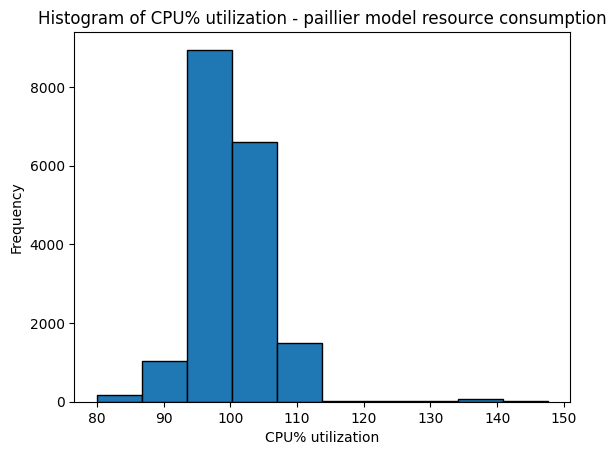

In [22]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [23]:
print(np.mean(filtered_paillier_cpu_util))
print(np.median(filtered_paillier_cpu_util))

100.2923097826087
99.8


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

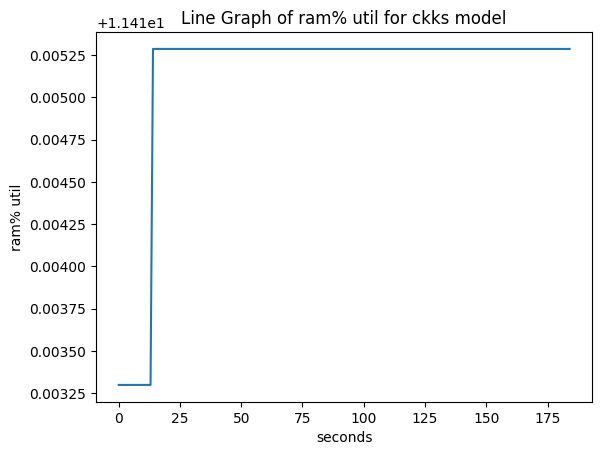

In [24]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [25]:
print(np.mean(ram_usages_ckks))
print(np.median(ram_usages_ckks))

11.415135530460356
11.415285851656


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model without rescaling')

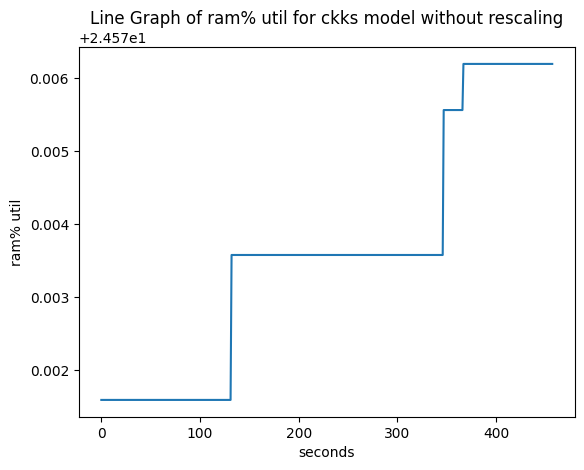

In [26]:
plt.plot(ram_usages_ckks2)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model without rescaling')

In [27]:
print(np.mean(ram_usages_ckks2))
print(np.median(ram_usages_ckks2))

24.573615593757367
24.573581094156918


Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

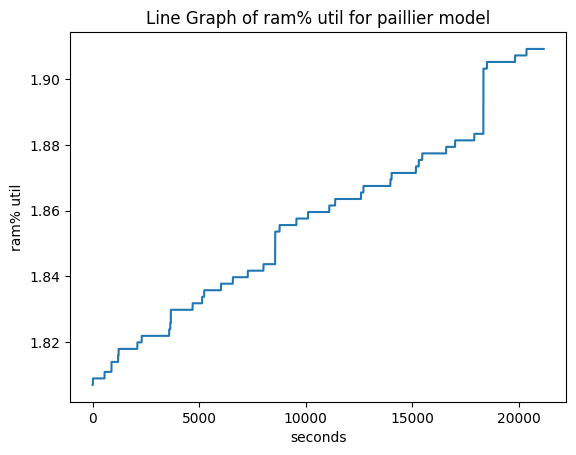

In [28]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [29]:
print(np.mean(ram_usages_paillier))
print(np.median(ram_usages_paillier))

1.8573812976646231
1.8595594132934452


In [30]:
np.mean(ram_usages_sklearn)

1.5518800703662627

In [31]:
train_time_ckks

250.42866778373718

In [32]:
train_time_ckks2

460.0067529678345

In [33]:
train_time_paillier

22299.35938334465

In [34]:
testing_time_ckks

7.2761359214782715

In [35]:
testing_time_ckks2

27.091827630996704

In [36]:
testing_time_paillier

968.237634897232

In [37]:
print(f"accuracy sklearn model: {accuracy_sklearn}")
print(f"accuracy ckks model (with manual rescaling): {accuracy_ckks}")
print(f"accuracy ckks model (without rescaling): {accuracy_ckks2}")
print(f"accuracy paillier model: {accuracy_paillier}")

accuracy sklearn model: 0.8111111111111111
accuracy ckks model (with manual rescaling): 0.8037037037037037
accuracy ckks model (without rescaling): 0.7962962962962963
accuracy paillier model: 0.7962962962962963
